In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os # accessing directory structure
import pandas as pd
import math

In [2]:
for dirname, _, filenames in os.walk('horses'):
    horse_files = []
    race_files = []
    for filename in filenames:
        if "horse" in filename:
            horse_files.append(os.path.join(dirname, filename))
        elif "race" in filename:
            race_files.append(os.path.join(dirname, filename))
    print(os.path.join(dirname, filename))
    print(horse_files)
    print(race_files)

horses\testfile.csv
['horses\\horses_1990.csv', 'horses\\horses_1991.csv', 'horses\\horses_1992.csv', 'horses\\horses_1993.csv', 'horses\\horses_1994.csv', 'horses\\horses_1995.csv', 'horses\\horses_1996.csv', 'horses\\horses_1997.csv', 'horses\\horses_1998.csv', 'horses\\horses_1999.csv', 'horses\\horses_2000.csv', 'horses\\horses_2001.csv', 'horses\\horses_2002.csv', 'horses\\horses_2003.csv', 'horses\\horses_2004.csv', 'horses\\horses_2005.csv', 'horses\\horses_2006.csv', 'horses\\horses_2007.csv', 'horses\\horses_2008.csv', 'horses\\horses_2009.csv', 'horses\\horses_2010.csv', 'horses\\horses_2011.csv', 'horses\\horses_2012.csv', 'horses\\horses_2013.csv', 'horses\\horses_2014.csv', 'horses\\horses_2015.csv', 'horses\\horses_2016.csv', 'horses\\horses_2017.csv', 'horses\\horses_2018.csv', 'horses\\horses_2019.csv', 'horses\\horses_2020.csv']
['horses\\races_1990.csv', 'horses\\races_1991.csv', 'horses\\races_1992.csv', 'horses\\races_1993.csv', 'horses\\races_1994.csv', 'horses\\ra

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    print(df.shape)
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    nGraphRow = math.ceil(nGraphRow)
    print(nGraphRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
#Read horse files from disk
nRowsRead = None # specify 'None' if want to read whole file
df1 = pd.DataFrame()
for file in horse_files:
    csv_data = pd.read_csv(file, delimiter=',', nrows = nRowsRead)
    df1 = df1.append(csv_data, ignore_index=True)
df1.dataframeName = 'horses'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head()

d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3266: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3266: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


There are 4107315 rows and 28 columns


,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,NaN,...,NaN,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0,NaN
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,10,...,NaN,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0,NaN
2,271018,Just So,7.0,0.0,0.029412,0,J D Roberts,S Burrough,3,15,...,NaN,Sousa,Just Camilla,Ascertain I,14,1.521003,66,0.0,1.0,NaN
3,271018,Mandraki Shuffle,8.0,0.0,0.090909,0,Oliver Sherwood,M Richards,4,20,...,NaN,Mandalus,Indictment,Desert Call,14,1.521003,69,0.0,0.0,NaN
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,dist,...,NaN,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69,0.0,0.0,NaN


In [5]:
#Drop some columns
df1 = df1.drop(['positionL', 'dist', 'weightSt', 'weightLb', 'overWeight', 'outHandicap', 'headGear', 'father', 
         'mother', 'gfather', 'margin', 'runners', 'price'], axis=1)
df1.head()


,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,RPR,TR,OR,weight,res_win,res_place
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,111.0,94.0,NaN,69,1.0,1.0
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,101.0,88.0,NaN,69,0.0,1.0
2,271018,Just So,7.0,0.0,0.029412,0,J D Roberts,S Burrough,3,86.0,71.0,NaN,66,0.0,1.0
3,271018,Mandraki Shuffle,8.0,0.0,0.090909,0,Oliver Sherwood,M Richards,4,66.0,65.0,NaN,69,0.0,0.0
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,NaN,45.0,NaN,69,0.0,0.0


In [6]:
#Read race files from disk
nRowsRead = None # specify 'None' if want to read whole file
df2 = pd.DataFrame()
for file in race_files:
    csv_data = pd.read_csv(file, delimiter=',', nrows = nRowsRead)
    df2 = df2.append(csv_data, ignore_index=True)
df2.dataframeName = 'races'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')
df2.head()

There are 396572 rows and 19 columns


,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,19 fences,"[2922.5, 875.0, 420.0, 192.5]",398.3,4409.0,5028.0,GB,5,0,NaN
1,275156,Tramore (IRE),02:00,90/01/01,Tattersalls Mares E.B.F. Novice Chase,NaN,NaN,NaN,2m,Soft,12 fences,[],267.0,NaN,3218.0,IE,5,0,NaN
2,282203,Catterick,02:45,90/01/01,Scotch Corner Handicap Chase,NaN,0-125,NaN,1m7½f,Good To Firm,12 fences,"[2238.0, 618.0, 294.0]",238.0,3150.0,3116.5,GB,2,0,NaN
3,298761,Cheltenham,02:30,90/01/01,A. S. W. Handicap Hurdle,NaN,NaN,NaN,2m,Good To Firm,NaN,"[5117.0, 1526.0, 728.0, 329.0]",243.8,7700.0,3218.0,GB,2,0,NaN
4,301118,Windsor,03:30,90/01/01,Touchen End Handicap Hurdle,NaN,0-115,NaN,2m6f,Good,NaN,"[2344.8, 652.8, 314.4]",330.7,3312.0,4424.0,GB,1,0,NaN


In [7]:
#Print values and distributions of text columns 
print(f"Going: ", df2["condition"].unique(), "Count: ", df2["condition"].value_counts(dropna=False))
print(f"rclass: ", df2["rclass"].unique(), "Count: ", df2["rclass"].value_counts(dropna=False))
print(f"Band: ", df2["band"].unique(), "Count: ", df2["band"].value_counts(dropna=False))

Going:  ['Soft' 'Good To Firm' 'Good' 'Standard' 'Yielding' 'Good To Soft' 'Heavy'
 'Good To Yielding' 'Slow' 'Firm' 'Yielding To Soft' 'Hard' 'Fast'
 'Soft To Heavy' 'Very Soft' nan 'Holding' 'Sloppy' 'Muddy'
 'Standard To Slow' 'Standard To Fast' 'Frozen' 'Abandoned'] Count:  Good                103936
Good To Firm         69409
Standard             56992
Soft                 45755
Good To Soft         38286
Heavy                22801
Firm                 17610
Fast                  9578
Yielding              7054
Good To Yielding      5507
Yielding To Soft      5004
Very Soft             4540
Standard To Slow      3573
Soft To Heavy         3562
Slow                   995
Sloppy                 638
Hard                   495
Standard To Fast       373
Muddy                  305
Holding                 65
NaN                     48
Frozen                  37
Abandoned                9
Name: condition, dtype: int64
rclass:  [nan 'Class 1' 'Class 6' 'Class 4' 'Class 5' 'Class 2' 'Class

In [8]:
#Convert races.condition column to numeric using a map file giving decreasing value the firmer the ground
import csv
# Read the CSV file into a list of dictionaries
going_map = {}

with open('.\horses\going.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader) #skip header
    for row in reader:
        key, value = row
        going_map[key] = value

print(going_map)

df2['ncond'] = df2['condition'].map(going_map)


{'Good': ' 3', 'Good To Firm': '2', 'Standard': '3', 'Soft': '5', 'Good To Soft': '4', 'Heavy': '8', 'Firm': '1', 'Fast': '1', 'Yielding': '3', 'Good To Yielding': '4', 'Yielding To Soft': '5', 'Very Soft': '7', 'Standard To Slow': '5', 'Soft To Heavy': '6', 'Slow': '6', 'Sloppy': '8', 'Hard': '1', 'Standard To Fast': '2', 'Muddy': '8', 'Holding': '5', 'Frozen': '9', 'Abandoned': '10'}


In [9]:
#convert races.class to numeric
# Read the CSV file into a list of dictionaries
class_map = {}

with open('.\horses\class.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader) #skip header
    for row in reader:
        key, value = row
        class_map[key] = value

print(class_map)

df2['rclass'] = df2['rclass'].map(class_map)

{'Class 1': ' 1', 'Class 2': ' 2', 'Class 3': ' 3', 'Class 4': ' 4', 'Class 5': ' 5', 'Class 6': ' 6', 'Class 7': ' 7'}


In [10]:
#Drop columns
df2 = df2.drop(['time', 'title', 'band', 'ages', 'distance', 'condition', 'hurdles', 'prizes', 
         'winningTime', 'prize', 'countryCode', 'class', 'currency'], axis=1)


In [11]:
#Merge dataframes on rid
df = df1.merge(df2, on='rid', how='inner')
print("Merged dataframe shape: ", df.shape)
df.head(100)


Merged dataframe shape:  (4107315, 20)


,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,RPR,TR,OR,weight,res_win,res_place,course,date,rclass,metric,ncond
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,111.0,94.0,NaN,69,1.0,1.0,Exeter,90/01/01,NaN,5028.0,5
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,101.0,88.0,NaN,69,0.0,1.0,Exeter,90/01/01,NaN,5028.0,5
2,271018,Just So,7.0,0.0,0.029412,0,J D Roberts,S Burrough,3,86.0,71.0,NaN,66,0.0,1.0,Exeter,90/01/01,NaN,5028.0,5
3,271018,Mandraki Shuffle,8.0,0.0,0.090909,0,Oliver Sherwood,M Richards,4,66.0,65.0,NaN,69,0.0,0.0,Exeter,90/01/01,NaN,5028.0,5
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,NaN,45.0,NaN,69,0.0,0.0,Exeter,90/01/01,NaN,5028.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,326330,Birmingham's Pride,4.0,0.0,0.038462,0,Reg Hollinshead,C Hodgson,3,44.0,NaN,NaN,52,0.0,1.0,Southwell (AW),90/01/01,NaN,1609.0,3
96,326330,Razeen,5.0,0.0,0.133333,0,J G Fitzgerald,Kieren Fallon,4,NaN,NaN,NaN,58,0.0,0.0,Southwell (AW),90/01/01,NaN,1609.0,3
97,326330,Trace Of Irony,4.0,0.0,0.083333,0,Chris Wall,Billy Newnes,5,NaN,NaN,NaN,55,0.0,0.0,Southwell (AW),90/01/01,NaN,1609.0,3
98,326330,Gargoor,4.0,0.0,0.058824,0,N A Callaghan,Michael Tebbutt,6,NaN,NaN,NaN,54,0.0,0.0,Southwell (AW),90/01/01,NaN,1609.0,3


In [12]:
#Factorise text columns
df['horseName'], unique_text = pd.factorize(df['horseName'])

# Create a DataFrame for the mapping
horsename_df = pd.DataFrame({
    'ID': range(len(unique_text)),
    'Original_Text': unique_text
})

df['trainerName'], unique_text = pd.factorize(df['trainerName'])

# Create a DataFrame for the mapping
trainername_df = pd.DataFrame({
    'ID': range(len(unique_text)),
    'Original_Text': unique_text
})

df['jockeyName'], unique_text = pd.factorize(df['jockeyName'])

# Create a DataFrame for the mapping
jockeyname_df = pd.DataFrame({
    'ID': range(len(unique_text)),
    'Original_Text': unique_text
})

df['course'], unique_text = pd.factorize(df['course'])

# Create a DataFrame for the mapping
course_df = pd.DataFrame({
    'ID': range(len(unique_text)),
    'Original_Text': unique_text
})

print(horsename_df)
print(trainername_df)
print(jockeyname_df)
print(course_df)


            ID     Original_Text
0            0        Combermere
1            1     Royal Battery
2            2           Just So
3            3  Mandraki Shuffle
4            4    Turnberry Dawn
...        ...               ...
371864  371864          Dynamore
371865  371865    Flying Sardine
371866  371866     Aimee's Jewel
371867  371867     Times Ticking
371868  371868        Awesome Al

[371869 rows x 2 columns]
          ID                       Original_Text
0          0                           R G Frost
1          1                          D H Barons
2          2                         J D Roberts
3          3                     Oliver Sherwood
4          4                         T B Hallett
...      ...                                 ...
18443  18443                         Sarah Bowen
18444  18444                       A Al Mehairbi
18445  18445  Steven O'Dea &amp; Matthew Hoysted
18446  18446                    Hitoshi Kotegawa
18447  18447                        Bu

In [13]:
#Export dataset
df.head()
df.to_csv('testfile.csv', index=False)

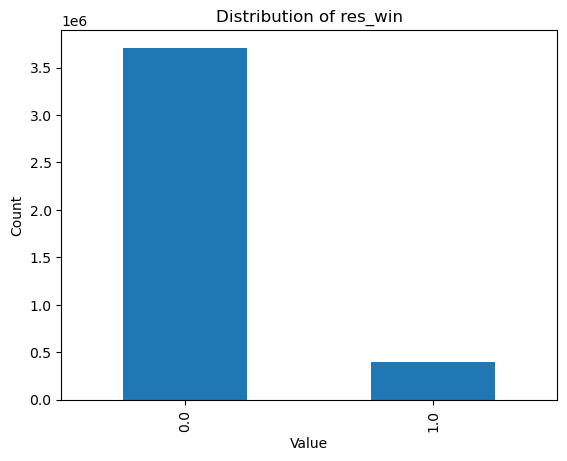

In [14]:
# Distribution of res_win in dataset
counts = df['res_win'].value_counts()

# Plotting
counts.plot(kind='bar')
plt.title('Distribution of res_win')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [15]:
# Correlation matrix plot function
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
#    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


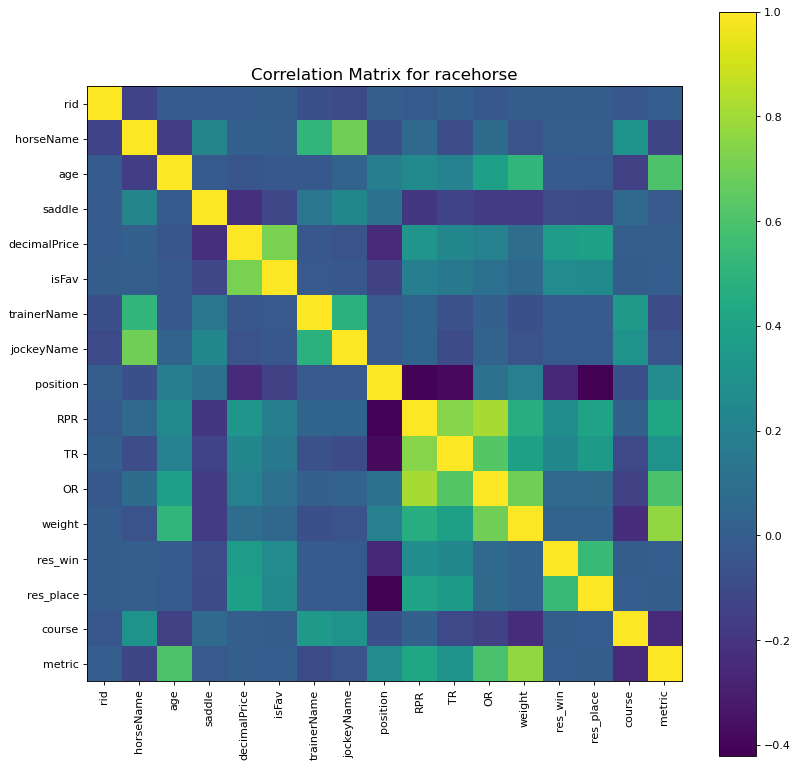

In [16]:
df.dataframeName = 'racehorse'
plotCorrelationMatrix(df, 12)

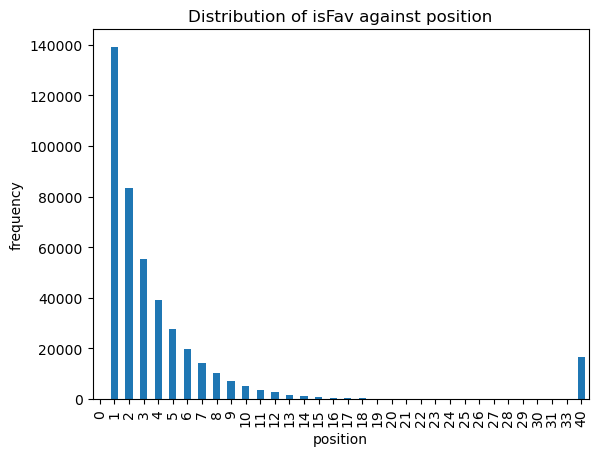

Probability of favourite winning:  1     139143
2      83245
3      55143
4      39104
5      27776
6      19724
40     16655
7      14225
8      10169
9       7191
10      5178
11      3599
12      2598
13      1756
14      1154
15       792
16       515
17       314
18       206
19       134
20       100
22        56
21        46
23        42
24        18
0         16
28        12
26        11
25         8
27         6
30         2
29         1
31         1
33         1
Name: position, dtype: int64


In [17]:
#Plot Favourite vs Finishing Place
filtered_df = df[df['isFav']==1]
filtered_df['position'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('position')
plt.ylabel('frequency')
plt.title('Distribution of isFav against position')
plt.show()
print("Probability of favourite winning: ", filtered_df['position'].value_counts())

In [18]:
#probability of Favourite winning
counts = df[df['isFav'] == 1]['position'].value_counts(normalize=True)

# Fetch the probability of position being 1 where isFav is 1
probability = counts.get(1, 0)

print(f"Probability of position == 1 where isFav == 1: {probability:.2f}")

Probability of position == 1 where isFav == 1: 0.32


Probability that the max RPR has res_win = 1: 0.71


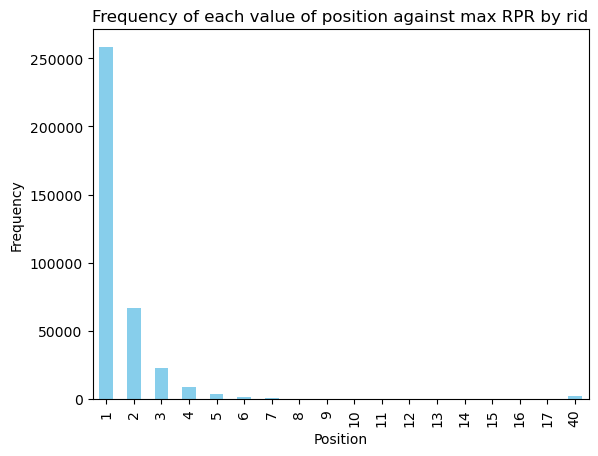

In [19]:
#Plot max RPR for each race winning
# Sort the dataframe and pick the row with maximum RPR for each 'rid'
sorted_df = df.dropna(subset=['RPR']).sort_values(['rid', 'RPR'], ascending=[True, False])
top_rpr_df = sorted_df.groupby('rid').first().reset_index()

# Calculate the probability
total_max_rpr_records = top_rpr_df.shape[0]
winning_max_rpr_records = top_rpr_df[top_rpr_df['res_win'] == 1].shape[0]
probability = winning_max_rpr_records / total_max_rpr_records

print(f"Probability that the max RPR has res_win = 1: {probability:.2f}")

# Plot bar chart
position_counts = top_rpr_df['position'].value_counts().sort_index()
position_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Frequency of each value of position against max RPR by rid')
plt.show()

In [20]:
#final data clearup
df = df.drop(['rid', 'position', 'res_place', 'OR', 'rclass', 'date'], axis=1)
df = df.dropna()
#Drop rows with a NaN
rows_with_nan = df[df.isna().any(axis=1)]
#check no NaN rows
print(rows_with_nan)
#Convert decimal to integer
df['age'] = df['age'].astype(int)
df['saddle'] = df['saddle'].astype(int)
df['res_win'] = df['res_win'].astype(int)
df['ncond'] = df['ncond'].astype(int)
print(df.shape)

Empty DataFrame
Columns: [horseName, age, saddle, decimalPrice, isFav, trainerName, jockeyName, RPR, TR, weight, res_win, course, metric, ncond]
Index: []
(2291748, 14)


In [21]:
#Initialise vanilla XGBoostClassifier model
import xgboost as xgb
clf = xgb.XGBClassifier()


In [22]:
#Create train/test sets
from sklearn.model_selection import train_test_split

X = df.drop(['res_win'], axis=1)
y = df['res_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
#Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model trained")

Model trained


In [88]:
#Report model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
f1score = f1_score(y_test, y_pred)
print(f"F1 score: {f1score * 100:.2f}%")
y_pred_proba = clf.predict_proba(X_test)[:,1]
rocscore = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {rocscore * 100:.2f}%")
confusionmatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ", confusionmatrix)
precision = confusionmatrix[1,1]/(confusionmatrix[1,1]+confusionmatrix[0,1])
recall = confusionmatrix[1,1]/(confusionmatrix[1,1]+confusionmatrix[1,0])
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
F1calc = (2 * (precision*recall))/(precision+recall)
print(f"F1 Score Manual Calc: {F1calc * 100:.2f}%")

Accuracy: 88.40%
F1 score: 31.50%
ROC AUC: 86.33%
Confusion matrix:  [[392933   7218]
 [ 45969  12230]]
Precision: 62.89%
Recall: 21.01%
F1 Score Manual Calc: 31.50%


In [23]:
#reduce train dataset size to speed up learning
print(df.shape)
print(X_train.shape)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
print(X_train2.shape)


(2291748, 14)
(1833398, 13)
(183339, 13)


In [24]:
#Reset classifier and use sklearn optimiser

from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold

# set the hyperparameter space
clf = xgb.XGBClassifier()
cv = StratifiedKFold(n_splits=10)
param_grid = [
    Integer(450, 500, name='n_estimators'),
    Integer(3, 8, name='max_depth'),
    Real(0.01, 0.99, name='learning_rate'),
    Categorical(['gbtree', 'dart'], name='booster'),
    Real(0.01, 10, name='gamma'),
    Real(0.50, 0.90, name='subsample'),
    Real(0.8, 0.85, name='colsample_bytree'),
    Integer(1, 50, name='reg_lambda'),
]


In [40]:
# Optimising function
@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    clf.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            clf, 
            X_train2,
            y_train2,
            cv=cv,
            n_jobs=-1,
            scoring='f1',
            verbose = 1)

    )
    print(value)
    # negate because we need to minimize
    return -value

In [41]:
# gp_minimize performs by default GP Optimization 
# using a Marten Kernel
print("Optimisation started...")
gp_ = gp_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    n_initial_points=10, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=10, # the number of subsequent evaluations of f(x)
    random_state=0, 
)

Optimisation started...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  3.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3497595762957803


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 23.7min remaining: 15.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 37.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3441043017559766


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  4.0min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.32414391802802645


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.34703886175858334


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 22.2min remaining: 14.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 35.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.32568204844089743


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  4.2min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3143409432845502


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.284730427559075


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3349262844157651


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.2782961491666394


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 25.2min remaining: 16.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 39.5min finished


0.2752974929889951


In [42]:
# function value at the minimum.
# note that it is the negative of the accuracy

"Best score=%.4f" % gp_.fun

'Best score=-0.3498'

In [46]:
gp_.x

[480,
 7,
 0.8507867052703019,
 'gbtree',
 6.239401330891865,
 0.65375268291708,
 0.8148767303272236,
 4]

In [48]:
print("""Best parameters for XGBoost Classifier:
=========================
- n_estimators = %d
- colsample_bytree = %.6f
- learning_rate = %.6f
- booster = %s
- gamma = %.6f
= subsample = %.6f
- colsample_bytree = %.6f
""" % (gp_.x[0],
       gp_.x[1],
       gp_.x[2],
       gp_.x[3],
       gp_.x[4],
       gp_.x[5],
       gp_.x[6],
      ))

Best parameters:
- n_estimators = 480
- colsample_bytree = 7.000000
- learning_rate = 0.850787
- booster = gbtree
- gamma = 6.239401
= subsample = 0.653753
- colsample_bytree = 0.814877



<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

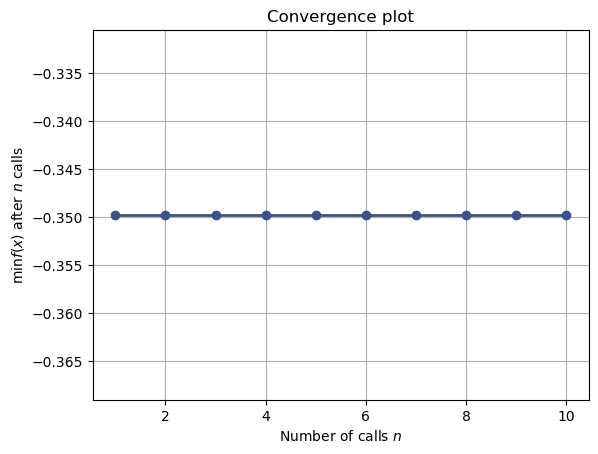

In [49]:
# Show convergence plot
from skopt.plots import plot_convergence
plot_convergence(gp_)

In [90]:
# Populate model with optimised hyperparameters
clf_optimised = xgb.XGBClassifier()
params = {
        "n_estimators": 480,
        "colsample_bytree": 7,
        "learning_rate": 0.850787,
        "booster": "gbtree",
        "gamma": 6.239401,
        "subsample": 0.653753,
        "colsample_bytree": 0.814877,
        }

clf.set_params(**params)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.814877, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=6.239401, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.850787, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=480, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [91]:
#Train the optimised model
clf_optimised.fit(X_train, y_train)
y_pred = clf_optimised.predict(X_test)
print("Optimised Model trained")

Optimised Model trained


In [92]:
#Report model metrics

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
f1score = f1_score(y_test, y_pred)
print(f"F1 score: {f1score * 100:.2f}%")
y_pred_proba = clf_optimised.predict_proba(X_test)[:,1]
rocscore = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {rocscore * 100:.2f}%")
confusionmatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ", confusionmatrix)
precision = confusionmatrix[1,1]/(confusionmatrix[1,1]+confusionmatrix[0,1])
recall = confusionmatrix[1,1]/(confusionmatrix[1,1]+confusionmatrix[1,0])
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
F1calc = (2 * (precision*recall))/(precision+recall)
print(f"F1 Score Manual Calc: {F1calc * 100:.2f}%")

Accuracy: 88.40%
F1 score: 31.50%
ROC AUC: 86.33%
Confusion matrix:  [[392933   7218]
 [ 45969  12230]]
Precision: 62.89%
Recall: 21.01%
F1 Score Manual Calc: 31.50%


In [ ]:
#Try Random Forest Vanilla Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train2, y_train2)  
y_pred = rfc.predict(X_test)
print("RFC Model trained")

In [ ]:
#Jupyter fails with Dead Kernel error from the cell above to the end of the notebook :(

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
f1score = f1_score(y_test, y_pred)
print(f"F1 score: {f1score * 100:.2f}%")
y_pred_proba = rfc.predict_proba(X_test)[:,1]
rocscore = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {rocscore * 100:.2f}%")
confusionmatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ", confusionmatrix)

In [ ]:
#Optimise Random Forest Classifier
#Reset classifier and use sklearn optimiser

from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score, train_test_split


rfc = RandomForestClassifier()

param_grid = [
    Integer(10, 500, name='n_estimators'),
    Integer(3, 10, name='max_depth'),
    Categorical(['None', 'balanced'], name='class_weight'),
    Categorical(['True', 'False'], name='bootstrap'),
    Real(0.0, 1.0, name='min_impurity_decrease'),
]


In [43]:
# Optimising function for Random Forest Classifier
def objective_rfc(**params):
    
    # model with new parameters
    rfc.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            rfc, 
            X_train2,
            y_train2,
            n_jobs=-1,
            scoring='f1',
            verbose = 1)

    )
    print(value)
    # negate because we need to minimize
    return -value

In [45]:
# gp_minimize performs by default GP Optimization 
# using a Marten Kernel
print("Optimisation started...")
gp_ = gp_minimize(
    objective_rfc, # the objective function to minimize
    param_grid, # the hyperparameter space
    n_initial_points=10, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=10, # the number of subsequent evaluations of f(x)
    random_state=0, 
)

Optimisation started...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   44.3s remaining:  1.1min


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
# function value at the minimum.
# note that it is the negative of the accuracy

"Best score=%.4f" % gp_.fun

In [ ]:
print("""Best parameters for Random Forest Classifier:
=========================
- n_estimators = %d
- max_depth = %.6f
- class_weight = %s
- bootsrap = %s
- min_impurity_decrease = %.6f
""" % (gp_.x[0],
       gp_.x[1],
       gp_.x[2],
       gp_.x[3],
       gp_.x[4],
      ))